In [36]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Display all columns in DataFrame
pd.set_option('display.max_columns', None)

# Load Data
file_path = "Active Users (4) (1) (1) (1) (1).xls"   
df = pd.read_excel(file_path)

# Quick check of data
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())


Shape of dataset: (4014, 60)

Columns: ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'w11', 'w12', 'w13', 'w14', 'w15', 'w16', 'w17', 'w18', 'w19', 'w20', 'w21', 'w22', 'w23', 'w24', 'w25', 'w26', 'w27', 'w28', 'w29', 'w30', 'w31', 'w32', 'w33', 'w34', 'w35', 'w36', 'w37', 'w38', 'w39', 'w40', 'w41', 'w42', 'w43', 'w44', 'w45', 'w46', 'w47', 'w48', 'w49', 'w50', 'w51', 'w52', 'w53', 'w54', 'w55', 'w56', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59']

First 5 rows:
                        w1                w2                w3  \
0         fd7c28f9fd8045f2  fd7c28f9fd8045f2  fd7c28f9fd8045f2   
1          673000000000000  5ff4cd01b5eae601  1402081a023d5c18   
2  15600000000000000000000  7cd4b3218dbffa0b  99acf0df83dc2831   
3         10156b703e26c334  25167a08527132ac  4820782b3cb8f570   
4         103f96126c333035  7fbf03c17ea12589  d8aaa5b13424da35   

                 w4                w5                w6                w7  \
0  fd7c28f9fd8045f2  fd7c28f

In [38]:
# Inspect the Data

# Shape of dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Column names and data types
print("\nData Types & Non-Null Counts:")
print(df.info())

# Summary statistics (numerical columns)
print("\nStatistical Summary:")
print(df.describe())

# Missing values check
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# First 10 rows preview
print("\nFirst 10 Rows:")
print(df.head(10))


Dataset Shape: (4014, 60)

Data Types & Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   w1           1759 non-null   object 
 1   w2           1654 non-null   object 
 2   w3           1732 non-null   object 
 3   w4           2116 non-null   object 
 4   w5           2193 non-null   object 
 5   w6           2157 non-null   object 
 6   w7           2551 non-null   object 
 7   w8           2875 non-null   object 
 8   w9           2795 non-null   object 
 9   w10          2821 non-null   object 
 10  w11          2746 non-null   object 
 11  w12          2906 non-null   object 
 12  w13          3080 non-null   object 
 13  w14          3051 non-null   object 
 14  w15          2953 non-null   object 
 15  w16          3066 non-null   object 
 16  w17          3045 non-null   object 
 17  w18          3099 non-null   obje

In [39]:
# General overview
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Dataset Shape: (4014, 60)

Columns: ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'w11', 'w12', 'w13', 'w14', 'w15', 'w16', 'w17', 'w18', 'w19', 'w20', 'w21', 'w22', 'w23', 'w24', 'w25', 'w26', 'w27', 'w28', 'w29', 'w30', 'w31', 'w32', 'w33', 'w34', 'w35', 'w36', 'w37', 'w38', 'w39', 'w40', 'w41', 'w42', 'w43', 'w44', 'w45', 'w46', 'w47', 'w48', 'w49', 'w50', 'w51', 'w52', 'w53', 'w54', 'w55', 'w56', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59']


In [40]:
# Summary statistics
print("\nStatistical Summary:")
print(df.describe(include="all"))


Statistical Summary:
                      w1                w2                w3  \
count               1759              1654              1732   
unique              1759              1654              1732   
top     fd7c28f9fd8045f2  fd7c28f9fd8045f2  fd7c28f9fd8045f2   
freq                   1                 1                 1   
mean                 NaN               NaN               NaN   
std                  NaN               NaN               NaN   
min                  NaN               NaN               NaN   
25%                  NaN               NaN               NaN   
50%                  NaN               NaN               NaN   
75%                  NaN               NaN               NaN   
max                  NaN               NaN               NaN   

                      w4                w5                w6  \
count               2116              2193              2157   
unique              2116              2193              2155   
top     fd7c28f9f

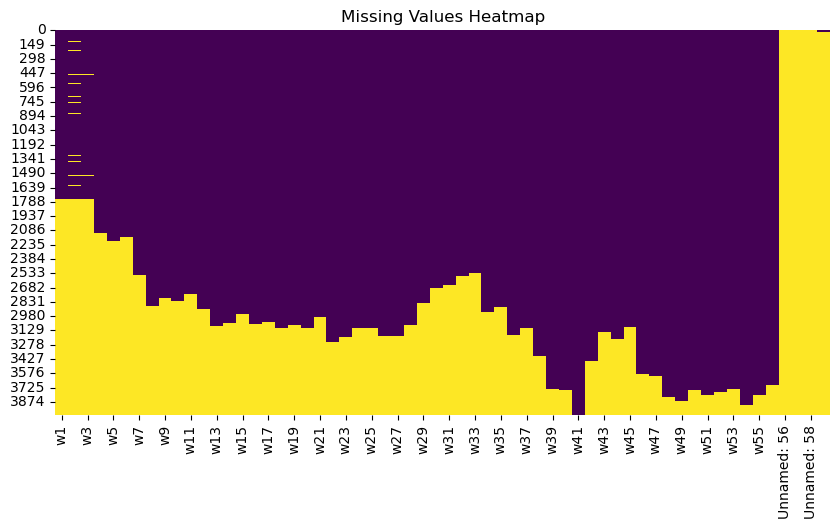

In [41]:
# Missing values heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

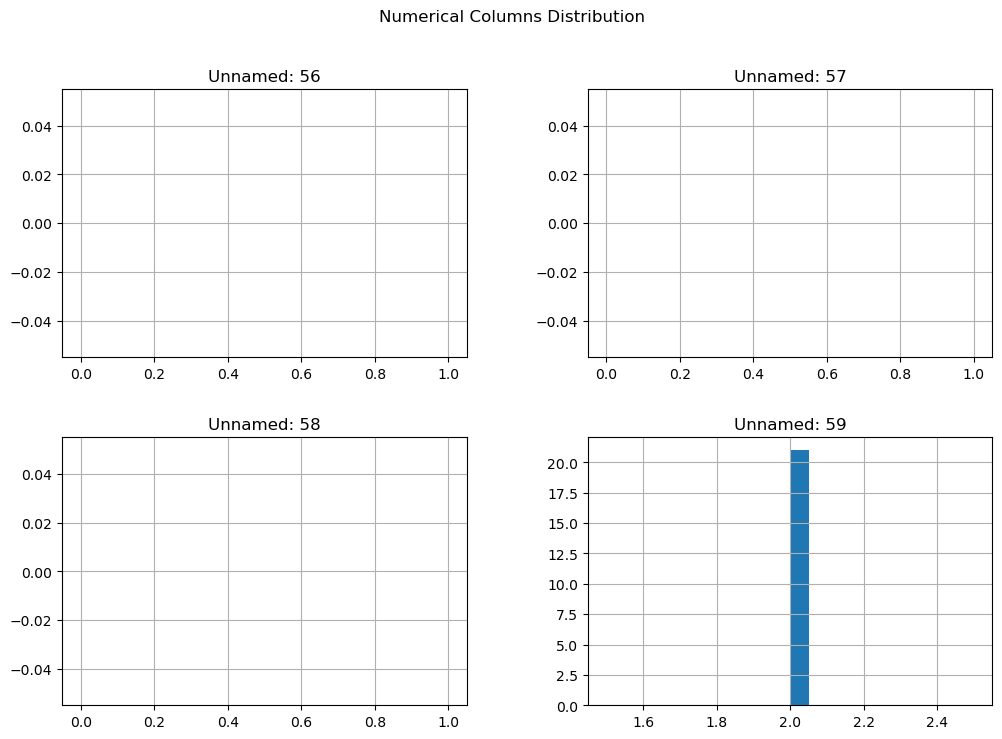

In [42]:
# Distribution of numerical features
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Numerical Columns Distribution")
plt.show()

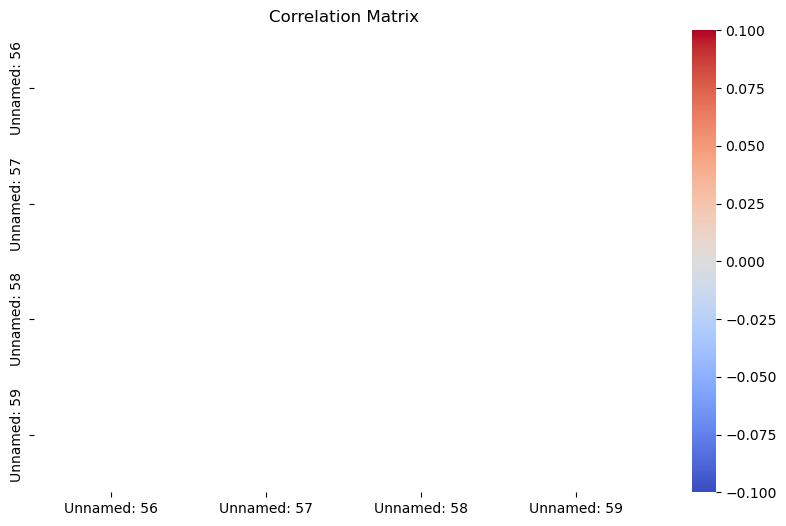

In [43]:
# Correlation matrix (numerical)
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [44]:
# Data Cleaning & Preprocessing

# Remove duplicates
df = df.drop_duplicates()
print("Duplicates removed. Shape:", df.shape)

Duplicates removed. Shape: (4014, 60)


In [45]:
# Handle missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled.")

Missing values handled.


In [46]:
# Outlier detection using IQR
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers detected")

Unnamed: 56: 0 outliers detected
Unnamed: 57: 0 outliers detected
Unnamed: 58: 0 outliers detected
Unnamed: 59: 0 outliers detected


In [47]:
print(df.columns)

Index(['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'w11',
       'w12', 'w13', 'w14', 'w15', 'w16', 'w17', 'w18', 'w19', 'w20', 'w21',
       'w22', 'w23', 'w24', 'w25', 'w26', 'w27', 'w28', 'w29', 'w30', 'w31',
       'w32', 'w33', 'w34', 'w35', 'w36', 'w37', 'w38', 'w39', 'w40', 'w41',
       'w42', 'w43', 'w44', 'w45', 'w46', 'w47', 'w48', 'w49', 'w50', 'w51',
       'w52', 'w53', 'w54', 'w55', 'w56', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59'],
      dtype='object')


In [48]:
# Define User Cohorts (Weekly)

# Identify the week columns
week_cols = [col for col in df.columns if col.startswith("w")]

# Find the first active week for each user
df['cohort_week'] = df[week_cols].ne(0).idxmax(axis=1)  

# Count users per cohort
cohort_counts = df.groupby('cohort_week').size()

print("Users per Cohort (based on first active week):")
print(cohort_counts)

# Example: Show first 10 users with cohort
print("\nSample users with their cohort assignment:")
print(df[['cohort_week']].head(10))


Users per Cohort (based on first active week):
cohort_week
w1    4014
dtype: int64

Sample users with their cohort assignment:
  cohort_week
0          w1
1          w1
2          w1
3          w1
4          w1
5          w1
6          w1
7          w1
8          w1
9          w1


In [49]:
import pandas as pd

# Ensure week columns are numeric (convert "1"/"0" strings to integers)
week_cols = [col for col in df.columns if col.startswith("w")]
df[week_cols] = df[week_cols].apply(pd.to_numeric, errors="coerce").fillna(0)

metrics = []
prev_users = set()
all_past_users = set()   # to correctly calculate resurrected

for i, week in enumerate(week_cols):
    # Get active users for this week
    active_users = set(df.index[df[week] > 0])
    wau = len(active_users)

    if i == 0:
        retained = 0
        churned = 0
        new = wau
        resurrected = 0
        retention_rate = None
        quick_ratio = None
    else:
        retained = len(active_users & prev_users)
        churned = len(prev_users - active_users)
        new = len(active_users - all_past_users)
        resurrected = len((active_users - prev_users) & all_past_users)

        # Retention Rate
        retention_rate = (retained / len(prev_users) * 100) if len(prev_users) > 0 else None

        # Quick Ratio
        quick_ratio = ((new + resurrected + retained) / churned) if churned > 0 else float("inf")

    metrics.append({
        "week": week,
        "WAU": wau,
        "retained": retained,
        "new": new,
        "resurrected": resurrected,
        "churned": churned,
        "Retention Rate %": retention_rate,
        "Quick Ratio": quick_ratio
    })

    # Update for next iteration
    all_past_users |= active_users
    prev_users = active_users

metrics_df = pd.DataFrame(metrics)
print(metrics_df.head(10))

  week  WAU  retained  new  resurrected  churned  Retention Rate %  \
0   w1    2         0    2            0        0               NaN   
1   w2    0         0    0            0        2               0.0   
2   w3    1         0    1            0        0               NaN   
3   w4    1         0    1            0        1               0.0   
4   w5    2         0    2            0        1               0.0   
5   w6    1         0    1            0        2               0.0   
6   w7    0         0    0            0        1               0.0   
7   w8    2         0    2            0        0               NaN   
8   w9    3         0    3            0        2               0.0   
9  w10    2         0    2            0        3               0.0   

   Quick Ratio  
0          NaN  
1     0.000000  
2          inf  
3     1.000000  
4     2.000000  
5     0.500000  
6     0.000000  
7          inf  
8     1.500000  
9     0.666667  


In [50]:
# Step 5: Build the Metrics Table

week_cols = [col for col in df.columns if col.startswith("w")]
metrics = []

prev_users = set()

for i, week in enumerate(week_cols):
    active_users = set(df.index[df[week] > 0])   # users active this week
    wau = len(active_users)
    
    if i == 0:  # first week
        new = wau
        retained = 0
        resurrected = 0
        churned = 0
        retention_rate = "-"
        quick_ratio = "-"
    else:
        retained = len(active_users & prev_users)
        churned = len(prev_users - active_users)
        new = len(active_users - prev_users)
        resurrected = len(active_users - prev_users)  # can refine if inactive earlier
        
        retention_rate = round((retained / len(prev_users) * 100), 1) if len(prev_users) > 0 else "-"
        quick_ratio = round((new + resurrected + retained) / churned, 2) if churned > 0 else "∞"
    
    metrics.append({
        "week": week,
        "WAU": wau,
        "new": new,
        "retained": retained,
        "resurrected": resurrected,
        "churned": churned,
        "retention_rate_%": retention_rate,
        "quick_ratio": quick_ratio
    })
    
    prev_users = active_users

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

   week  WAU  new  retained  resurrected  churned retention_rate_% quick_ratio
0    w1    2    2         0            0        0                -           -
1    w2    0    0         0            0        2              0.0         0.0
2    w3    1    1         0            1        0                -           ∞
3    w4    1    1         0            1        1              0.0         2.0
4    w5    2    2         0            2        1              0.0         4.0
5    w6    1    1         0            1        2              0.0         1.0
6    w7    0    0         0            0        1              0.0         0.0
7    w8    2    2         0            2        0                -           ∞
8    w9    3    3         0            3        2              0.0         3.0
9   w10    2    2         0            2        3              0.0        1.33
10  w11    2    2         0            2        2              0.0         2.0
11  w12    2    2         0            2        2   

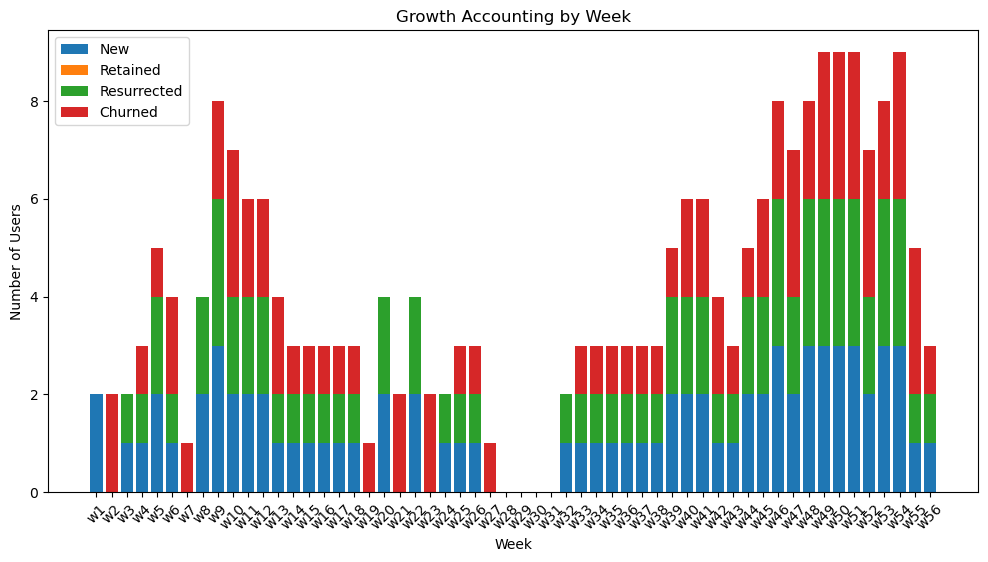

In [51]:
# Ensure metrics_df has proper numeric values
metrics_df_plot = metrics_df.copy()
metrics_df_plot = metrics_df_plot.replace("-", 0)
metrics_df_plot['quick_ratio'] = metrics_df_plot['quick_ratio'].replace("∞", None).astype(float)

# Stacked Bar Chart - Growth Accounting
plt.figure(figsize=(12,6))
plt.bar(metrics_df_plot['week'], metrics_df_plot['new'], label='New')
plt.bar(metrics_df_plot['week'], metrics_df_plot['retained'], bottom=metrics_df_plot['new'], label='Retained')
plt.bar(metrics_df_plot['week'], metrics_df_plot['resurrected'], 
        bottom=metrics_df_plot['new']+metrics_df_plot['retained'], label='Resurrected')
plt.bar(metrics_df_plot['week'], metrics_df_plot['churned'], 
        bottom=metrics_df_plot['new']+metrics_df_plot['retained']+metrics_df_plot['resurrected'], label='Churned')

plt.title("Growth Accounting by Week")
plt.xlabel("Week")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend()
plt.show()

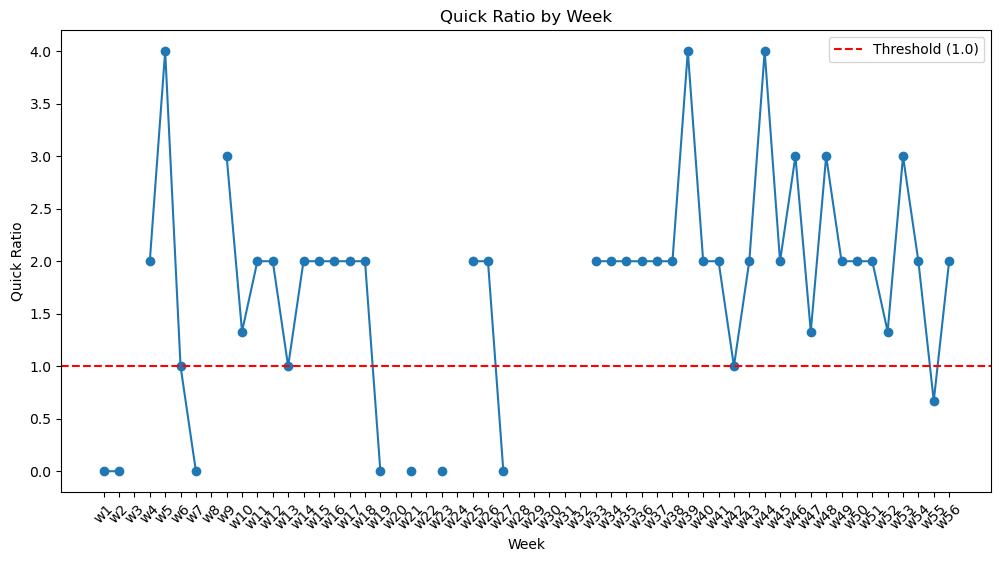

In [52]:
# Line Chart - Quick Ratio
plt.figure(figsize=(12,6))
plt.plot(metrics_df_plot['week'], metrics_df_plot['quick_ratio'], marker='o', linestyle='-')
plt.axhline(y=1, color='red', linestyle='--', label='Threshold (1.0)')
plt.title("Quick Ratio by Week")
plt.xlabel("Week")
plt.ylabel("Quick Ratio")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [53]:
def generate_insights(metrics_df):
    insights = []

    # Clean numeric columns (replace "-" with 0 or NaN where needed)
    df = metrics_df.copy()
    df = df.replace("-", 0)
    df['retention_rate_%'] = pd.to_numeric(df['retention_rate_%'], errors='coerce')
    df['quick_ratio'] = df['quick_ratio'].replace("∞", None)
    df['quick_ratio'] = pd.to_numeric(df['quick_ratio'], errors='coerce')
    
    # Churn analysis
    avg_churn = df['churned'].astype(float).mean()
    if avg_churn > df['WAU'].mean() * 0.4: 
        insights.append(" High churn detected: users are not finding the product sticky.")
    else:
        insights.append(" Churn is relatively low, suggesting users continue to engage after joining.")

    # Quick Ratio health
    avg_qr = df['quick_ratio'].mean(skipna=True)
    if avg_qr > 1:
        insights.append(f" Quick ratio averages {avg_qr:.2f}, indicating healthy user growth.")
    else:
        insights.append(f" Quick ratio averages {avg_qr:.2f}, showing churn may be outweighing growth.")

    # Resurrected users
    resurrected_share = (df['resurrected'].astype(float).sum() / df['WAU'].sum()) * 100
    if resurrected_share > 20:
        insights.append(" A large portion of users are 'resurrected' — they return after leaving, suggesting value is there but not sticky.")
    else:
        insights.append(" Most active users are new or retained, not just resurrected — engagement looks consistent.")

    #  New user dependency
    new_share = (df['new'].astype(float).sum() / df['WAU'].sum()) * 100
    if new_share > 50:
        insights.append(" Growth is heavily dependent on new users — without strong retention, growth may stall.")
    else:
        insights.append(" Retention contributes significantly to WAU — growth is not only from new users.")

    # Retention strength
    avg_retention = df['retention_rate_%'].mean(skipna=True)
    if avg_retention > 50:
        insights.append(f" Average retention rate is {avg_retention:.1f}%, showing users find recurring value.")
    else:
        insights.append(f" Average retention rate is {avg_retention:.1f}%, which is low — onboarding or value delivery may need improvement.")

    return insights


# Run the insights generator
insights = generate_insights(metrics_df)
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


1.  High churn detected: users are not finding the product sticky.
2.  Quick ratio averages 1.78, indicating healthy user growth.
3.  A large portion of users are 'resurrected' — they return after leaving, suggesting value is there but not sticky.
4.  Growth is heavily dependent on new users — without strong retention, growth may stall.
5.  Average retention rate is 0.0%, which is low — onboarding or value delivery may need improvement.


In [54]:
def growth_retention_analysis(metrics_df):
    df = metrics_df.copy()
    df = df.replace("-", 0)

    # Ensure numeric
    for col in ['WAU','new','retained','resurrected','churned','retention_rate_%','quick_ratio']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    analysis = {}

    # 1. Week-over-week retention trend
    analysis['retention_trend'] = df[['week','retention_rate_%']].dropna()

    # Check improvement or decline
    if df['retention_rate_%'].iloc[-1] > df['retention_rate_%'].iloc[0]:
        analysis['retention_message'] = " Retention rate has improved over time."
    else:
        analysis['retention_message'] = " Retention rate shows decline or stagnation over time."

    # 2. Churn numbers & churn-to-new ratio
    df['churn_to_new_ratio'] = df['churned'] / df['new'].replace(0, np.nan)
    analysis['avg_churn'] = df['churned'].mean()
    analysis['avg_churn_to_new_ratio'] = df['churn_to_new_ratio'].mean(skipna=True)

    # 3. Quick Ratio health
    healthy_weeks = (df['quick_ratio'] > 1).sum()
    unhealthy_weeks = (df['quick_ratio'] <= 1).sum()
    analysis['quick_ratio_summary'] = f"{healthy_weeks} weeks healthy (QR > 1), {unhealthy_weeks} weeks unhealthy (QR ≤ 1)."

    # 4. Composition of active users each week
    df['pct_new'] = (df['new'] / df['WAU']) * 100
    df['pct_retained'] = (df['retained'] / df['WAU']) * 100
    df['pct_resurrected'] = (df['resurrected'] / df['WAU']) * 100
    analysis['composition'] = df[['week','pct_new','pct_retained','pct_resurrected']]

    # 5. Average user lifetime (before churning)
    # Approximation: Lifetime = Retention probability until churn
    churn_rates = df['churned'] / df['WAU']
    avg_lifetime_weeks = 1 / churn_rates.mean() if churn_rates.mean() > 0 else np.inf
    analysis['avg_lifetime_weeks'] = avg_lifetime_weeks

    return analysis


# Run analysis
analysis_results = growth_retention_analysis(metrics_df)

# Print summary
print("1. Retention Trend:")
print(analysis_results['retention_trend'])
print(analysis_results['retention_message'])

print("\n2. Avg churn per week:", round(analysis_results['avg_churn'],2))
print("   Avg churn-to-new ratio:", round(analysis_results['avg_churn_to_new_ratio'],2))

print("\n3. Quick Ratio Health:", analysis_results['quick_ratio_summary'])

print("\n4. User Composition (percentages):")
print(analysis_results['composition'])

print(f"\n5. Avg user lifetime before churn: ~{analysis_results['avg_lifetime_weeks']:.1f} weeks")

1. Retention Trend:
   week  retention_rate_%
0    w1               0.0
1    w2               0.0
2    w3               0.0
3    w4               0.0
4    w5               0.0
5    w6               0.0
6    w7               0.0
7    w8               0.0
8    w9               0.0
9   w10               0.0
10  w11               0.0
11  w12               0.0
12  w13               0.0
13  w14               0.0
14  w15               0.0
15  w16               0.0
16  w17               0.0
17  w18               0.0
18  w19               0.0
19  w20               0.0
20  w21               0.0
21  w22               0.0
22  w23               0.0
23  w24               0.0
24  w25               0.0
25  w26               0.0
26  w27               0.0
27  w28               0.0
28  w29               0.0
29  w30               0.0
30  w31               0.0
31  w32               0.0
32  w33               0.0
33  w34               0.0
34  w35               0.0
35  w36               0.0
36  w37           

In [55]:
def user_segmentation(metrics_df):
    df = metrics_df.copy()
    df = df.replace("-", 0)

    # Ensure numeric
    for col in ['WAU','new','retained','resurrected','churned']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    segmentation = {}

    # 1. Churn comparison: new vs resurrected users
    # Approximation: churn next week relative to group size this week
    df['next_week_churn'] = df['churned'].shift(-1)

    churn_from_new = (df['next_week_churn'] / df['new'].replace(0, np.nan)).mean()
    churn_from_resurrected = (df['next_week_churn'] / df['resurrected'].replace(0, np.nan)).mean()

    segmentation['churn_comparison'] = {
        "avg_churn_from_new": churn_from_new,
        "avg_churn_from_resurrected": churn_from_resurrected,
        "message": (
            " New users churn faster than resurrected ones."
            if churn_from_new > churn_from_resurrected
            else " Resurrected users churn more quickly than new ones, meaning newcomers may be stickier."
        )
    }

    # 2. Weeks with unusually high resurrected users
    avg_res = df['resurrected'].mean()
    high_res_weeks = df[df['resurrected'] > 1.5 * avg_res][['week','resurrected']]
    segmentation['high_resurrected'] = high_res_weeks

    # 3. Core retained base trend
    retained_trend = df[['week','retained']]
    if retained_trend['retained'].iloc[-1] > retained_trend['retained'].iloc[0]:
        retained_message = "The retained user base is growing — a strong core is forming."
    elif retained_trend['retained'].iloc[-1] < retained_trend['retained'].iloc[0]:
        retained_message = " The retained user base is shrinking — the core community may be weakening."
    else:
        retained_message = "The retained base is stable over time."

    segmentation['retained_trend'] = retained_trend
    segmentation['retained_message'] = retained_message

    return segmentation


# Run segmentation analysis
segmentation_results = user_segmentation(metrics_df)

# Print results
print("1. Churn Comparison (new vs resurrected):")
print(segmentation_results['churn_comparison'])

print("\n2. Weeks with unusually high resurrected users:")
print(segmentation_results['high_resurrected'])

print("\n3. Retained user base trend:")
print(segmentation_results['retained_trend'])
print(segmentation_results['retained_message'])

1. Churn Comparison (new vs resurrected):
{'avg_churn_from_new': 1.0, 'avg_churn_from_resurrected': 1.0, 'message': ' Resurrected users churn more quickly than new ones, meaning newcomers may be stickier.'}

2. Weeks with unusually high resurrected users:
   week  resurrected
8    w9            3
45  w46            3
47  w48            3
48  w49            3
49  w50            3
50  w51            3
52  w53            3
53  w54            3

3. Retained user base trend:
   week  retained
0    w1         0
1    w2         0
2    w3         0
3    w4         0
4    w5         0
5    w6         0
6    w7         0
7    w8         0
8    w9         0
9   w10         0
10  w11         0
11  w12         0
12  w13         0
13  w14         0
14  w15         0
15  w16         0
16  w17         0
17  w18         0
18  w19         0
19  w20         0
20  w21         0
21  w22         0
22  w23         0
23  w24         0
24  w25         0
25  w26         0
26  w27         0
27  w28         0
28 

In [56]:
def growth_sources(metrics_df):
    df = metrics_df.copy()
    df = df.replace("-", 0)

    # Ensure numeric
    for col in ['WAU','new','retained','resurrected','churned']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    results = {}

    # 1. Proportion of growth: acquisition vs resurrection
    total_growth = df['new'].sum() + df['resurrected'].sum()
    prop_new = (df['new'].sum() / total_growth) * 100 if total_growth > 0 else 0
    prop_res = (df['resurrected'].sum() / total_growth) * 100 if total_growth > 0 else 0
    results['growth_split'] = {
        "new_user_contribution_%": round(prop_new, 1),
        "resurrected_user_contribution_%": round(prop_res, 1)
    }

    # 2. Core retention vs acquisition-driven growth
    retained_share = (df['retained'].sum() / df['WAU'].sum()) * 100
    new_share = (df['new'].sum() / df['WAU'].sum()) * 100
    resurrected_share = (df['resurrected'].sum() / df['WAU'].sum()) * 100

    if retained_share > new_share:
        growth_message = " Growth is driven more by retention — a loyal core is sustaining activity."
    else:
        growth_message = " Growth relies heavily on new users — without acquisition, growth may slow."

    results['growth_drivers'] = {
        "retained_%": round(retained_share,1),
        "new_%": round(new_share,1),
        "resurrected_%": round(resurrected_share,1),
        "message": growth_message
    }

    # 3. Correlation between spikes in new users & churn
    correlation = df['new'].corr(df['churned'])
    results['new_vs_churn_correlation'] = {
        "correlation_coefficient": round(correlation, 2),
        "message": (
            " Positive correlation: acquisition pushes lead to higher churn later."
            if correlation > 0.3
            else " Low/negative correlation: new user spikes are not strongly linked to churn."
        )
    }

    return results


# Run growth source analysis
growth_results = growth_sources(metrics_df)

# Print results
print("1. Growth Split (New vs Resurrected):")
print(growth_results['growth_split'])

print("\n2. Growth Drivers (Retained vs New vs Resurrected):")
print(growth_results['growth_drivers'])

print("\n3. Correlation between new user spikes & churn:")
print(growth_results['new_vs_churn_correlation'])

1. Growth Split (New vs Resurrected):
{'new_user_contribution_%': 50.7, 'resurrected_user_contribution_%': 49.3}

2. Growth Drivers (Retained vs New vs Resurrected):
{'retained_%': 0.0, 'new_%': 100.0, 'resurrected_%': 97.4, 'message': ' Growth relies heavily on new users — without acquisition, growth may slow.'}

3. Correlation between new user spikes & churn:
{'correlation_coefficient': 0.49, 'message': ' Positive correlation: acquisition pushes lead to higher churn later.'}


In [57]:
import math
import numpy as np

def weeks_to_plateau(metrics_df, max_weeks=520, epsilon=1.0):
    """
    Simulate WAU forward assuming churn is constant (use average churn).
    Returns:
      - weeks_to_plateau (int or math.inf)
      - simulation_df (pandas.DataFrame) with projected WAU per week
      - message (str)
    """
    df = metrics_df.copy().replace("-", 0)
    for c in ['WAU','new','resurrected','churned']:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

    # Use last observed WAU as starting point
    start_wau = df['WAU'].iloc[-1]
    avg_new = df['new'].mean()
    avg_res = df['resurrected'].mean()
    churn_const = df['churned'].mean()

    net_weekly = avg_new + avg_res - churn_const

    # Immediate checks
    if abs(net_weekly) < 1e-9:
        return 0, pd.DataFrame([{'week_index':0, 'WAU':start_wau}]), "Net weekly change ≈ 0 with historical averages: WAU already at steady state."
    if net_weekly < 0:
        return 0, pd.DataFrame([{'week_index':0, 'WAU':start_wau}]), ("Net weekly change is negative with historical averages (WAU will decline). "
                                                                   "So business would NOT plateau upward — it would shrink under constant churn.")

    # simulate forward
    sim = []
    wau = start_wau
    for i in range(1, max_weeks+1):
        wau_next = wau + avg_new + avg_res - churn_const
        sim.append({'week_index': i, 'WAU': wau_next})
        if (wau_next - wau) < epsilon:
            sim_df = pd.DataFrame(sim)
            return i, sim_df, f"WAU increase dropped below {epsilon} users/week at week {i} (projected plateau)."
        wau = wau_next

    return math.inf, pd.DataFrame(sim), f"No plateau within {max_weeks} weeks (net weekly growth ~ {net_weekly:.2f} users/week)."

# Example run (requires metrics_df in scope)
weeks, sim_df, msg = weeks_to_plateau(metrics_df)
print("Weeks to plateau:", weeks)
print(msg)
# optionally: display sim_df.head(10) or plot sim_df['WAU']

Weeks to plateau: inf
No plateau within 520 weeks (net weekly growth ~ 1.36 users/week).


In [58]:
def compute_stickiness(metrics_df, rolling_window=4):
    df = metrics_df.copy().replace("-", 0)
    for c in ['WAU','new','retained']:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

    df['stickiness'] = df.apply(lambda r: (r['retained'] / r['new']) if r['new']>0 else np.nan, axis=1)
    df['stickiness_rolling'] = df['stickiness'].rolling(window=rolling_window, min_periods=1).mean()
    return df[['week','stickiness','stickiness_rolling']]

# Example run
stickiness_df = compute_stickiness(metrics_df)
print(stickiness_df)

   week  stickiness  stickiness_rolling
0    w1         0.0                 0.0
1    w2         NaN                 0.0
2    w3         0.0                 0.0
3    w4         0.0                 0.0
4    w5         0.0                 0.0
5    w6         0.0                 0.0
6    w7         NaN                 0.0
7    w8         0.0                 0.0
8    w9         0.0                 0.0
9   w10         0.0                 0.0
10  w11         0.0                 0.0
11  w12         0.0                 0.0
12  w13         0.0                 0.0
13  w14         0.0                 0.0
14  w15         0.0                 0.0
15  w16         0.0                 0.0
16  w17         0.0                 0.0
17  w18         0.0                 0.0
18  w19         NaN                 0.0
19  w20         0.0                 0.0
20  w21         NaN                 0.0
21  w22         0.0                 0.0
22  w23         NaN                 0.0
23  w24         0.0                 0.0


In [59]:
def detect_early_warnings(metrics_df, retention_drop_threshold=10.0, churn_growth_threshold=0.2, new_spike_factor=2.0):
    df = metrics_df.copy().replace("-", 0)
    for c in ['WAU','new','retained','resurrected','churned','retention_rate_%','quick_ratio']:
        df[c] = pd.to_numeric(df[c].replace("∞", np.nan), errors='coerce').fillna(0)

    warnings = []

    # 1. quick ratio weeks <= 1
    qr_issues = df[df['quick_ratio'] <= 1][['week','quick_ratio']]
    for _, r in qr_issues.iterrows():
        warnings.append(f"Week {r['week']}: Quick Ratio ≤ 1 ({r['quick_ratio']:.2f}) → growth may be unhealthy.")

    # 2. retention drops
    df['retention_prev'] = df['retention_rate_%'].shift(1)
    retention_drops = df[(df['retention_prev']>0) & ((df['retention_prev'] - df['retention_rate_%']) >= retention_drop_threshold)]
    for _, r in retention_drops.iterrows():
        warnings.append(f"Week {r['week']}: Retention dropped by {r['retention_prev'] - r['retention_rate_%']:.1f} percentage points from previous week.")

    # 3. churn surge
    df['churn_prev'] = df['churned'].shift(1).replace(0, np.nan)
    churn_surge = df[(df['churn_prev'].notnull()) & ((df['churned'] - df['churn_prev']) / df['churn_prev'] >= churn_growth_threshold)]
    for _, r in churn_surge.iterrows():
        pct = (r['churned'] - r['churn_prev']) / r['churn_prev'] * 100
        warnings.append(f"Week {r['week']}: Churn increased by {pct:.0f}% vs previous week (from {r['churn_prev']:.0f} to {r['churned']:.0f}).")

    # 4. new-user spikes followed by churn (check spikes and next-week churn increase)
    df['new_ma'] = df['new'].rolling(window=4, min_periods=1).mean()
    for idx, r in df.iterrows():
        if r['new_ma'] > 0 and r['new'] >= new_spike_factor * r['new_ma']:
            # look 1 or 2 weeks ahead for churn increase
            next1 = df['churned'].shift(-1).iloc[idx]
            next2 = df['churned'].shift(-2).iloc[idx]
            curr = r['churned']
            if pd.notna(next1) and next1 > curr * (1 + churn_growth_threshold):
                warnings.append(f"Week {r['week']}: New spike detected ({r['new']:.0f} new vs MA {r['new_ma']:.1f}) followed by +{(next1-curr)/curr*100:.0f}% churn next week.")
            elif pd.notna(next2) and next2 > curr * (1 + churn_growth_threshold):
                warnings.append(f"Week {r['week']}: New spike detected ({r['new']:.0f} new) followed by churn rising in 2 weeks (+{(next2-curr)/curr*100:.0f}%).")

    if not warnings:
        warnings = ["No early-warning signals detected with current thresholds."]
    return warnings

# Example run
warnings = detect_early_warnings(metrics_df)
for w in warnings:
    print("-", w)

- Week w1: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w2: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w3: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w6: Quick Ratio ≤ 1 (1.00) → growth may be unhealthy.
- Week w7: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w8: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w13: Quick Ratio ≤ 1 (1.00) → growth may be unhealthy.
- Week w19: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w20: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w21: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w22: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w23: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w24: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w27: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w28: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w29: Quick Ratio ≤ 1 (0.00) → growth may be unhealthy.
- Week w30: Qu